In [0]:
#import packages
import matplotlib.pyplot as plt
from numpy import *


![alt text](https://www.dropbox.com/s/o8pdg32oybtc84x/hypothesis%20function.png?raw=1 "hypothesis function")


In [0]:
# draws a line and plots scatter points on a graph given theta values and points
def plot_line_on_graph(theta, points):
    x_plots = []
    y_plots = []
    for i in range(0, len(points)):
        x = points[i, 0]
        y = theta[0] * x + theta[1]
        x_plots.append(x)
        y_plots.append(y)
    plt.scatter(points[:,0], points[:, 1])
    plt.plot(x_plots, y_plots)
    plt.show()

In [0]:
 # given theta values and points, returns the mean squared error of the hypothesis - actual y values
 def computer_error_for_line_given_points(theta, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0] 
        y = points[i, 1]
        # y = mx + b
        totalError += (y - (theta[0] * x + theta[1])) ** 2
    return totalError / float(len(points))

In [0]:
# calculates the partial derivative of theta 0 and 1 and returns updated theta values given a learning rate
def gradient_descent(t0_current, t1_current, points, learning_rate):
    t0_gradient = 0
    t1_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        t1_gradient += -(2/N) * (y - ((t0_current * x) + t1_current))
        t0_gradient += -(2/N) * x * (y - ((t0_current * x) + t1_current))
    new_t0 = t0_current - (learning_rate * t0_gradient)
    new_t1 = t1_current - (learning_rate * t1_gradient)
    return [new_t0, new_t1]

![alt text](https://www.dropbox.com/s/flraujue6t3qe6r/mean%20squared%20error%20function.png?raw=1 "mean squared error function")


In [0]:
# runs the gradient descent algorithm on a data set to find optimal theta values
def gradient_descent_runner(points, theta, learning_rate, num_iterations):
    iterations_count = 0
    for i in range(num_iterations):
        iterations_count += 1
        theta_0_old = theta[0]
        theta_1_old = theta[1]
        
        # update theta values
        theta[0], theta[1] = gradient_descent(theta[0], theta[1], array(points), learning_rate)
        plt.scatter(iterations_count, abs(theta[0] - theta_0_old) + abs(theta[1] - theta_1_old), c='r')

        # check to see if we have converged (rate of change is less than learning rate)
        if abs(theta[0] - theta_0_old) < learning_rate and abs(theta[1] - theta_1_old) < learning_rate:
            break
    print('Converged! Completed {0} iterations'.format(iterations_count))
    plt.show()
    return [theta[0], theta[1]]

![alt text](https://www.dropbox.com/s/bf1vfapy6ra4hgv/gradient%20descent%20graph.png?raw=1 "gradient descent graph")

What the graph is showing is the error values given different values of one of our parameters (say theta 0). The job of gradient descent is to work out the direction and amount we need to change the parameter in order to get it to the minimum error value (global cost minimum). To do this, gradient descent uses this algorithm:

![alt text](https://www.dropbox.com/s/0elysnmrut0ldc6/gradient%20descent.png?raw=1 "gradient descent algorithm")

What this is saying is given an original theta value, we calculate a new one by taking the old value and minus a value calculated using a learning rate * gradient. We do this for each theta value *simultaneously*. Now this part I find very hard to understand (given my lack of calculus experience), but we calculate the gradient using this formula:

![alt text](https://www.dropbox.com/s/9vcwzdwfisqig09/linear_regression_gradient.png?raw=1 "linear regression gradient algorithm")


In [0]:
def run():
    #import data from file
    points = genfromtxt("ww2data500.csv", delimiter=",", skip_header=True)

    #hyperparameters
    learning_rate = 0.0001
    num_iterations = 1000

    #starting theta values
    theta = ones(2)

    starting_error = computer_error_for_line_given_points(theta, points)
    print('The starting values are: theta0 is {0}, theta1 is {1}, the error is {2}'.format(theta[0], theta[1], starting_error))
    plot_line_on_graph(theta, points)

    # run gradient descent to find and return optimal theta values
    [theta[0], theta[1]] = gradient_descent_runner(points, theta, learning_rate, num_iterations)

    end_error = computer_error_for_line_given_points(theta, points)
    plot_line_on_graph(theta, points)
    print('The end values are: theta0 is {0}, theta1 is {1}, the error is {2}'.format(float(theta[0]), float(theta[1]), end_error))

Gradient descent is done iteratively using small steps. We nudge the theta values in the right direction until we reach convergence (the global minimum). It is important we don't take too large steps otherwise we might overshoot the global minimum:

![alt text](https://www.dropbox.com/s/252wdvpf36e710e/learning%20rate%20examples.png?raw=1 "learning rate")

Conversely, we shouldn't set it too small otherwise it would take far too many iterations to reach our ideal values.


The starting values are: theta0 is 1.0, theta1 is 1.0, the error is 48.82082684152009


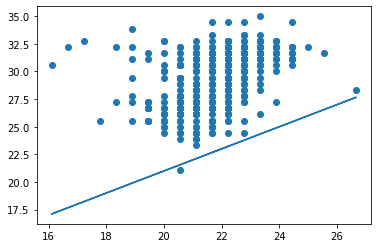

Converged! Completed 58 iterations


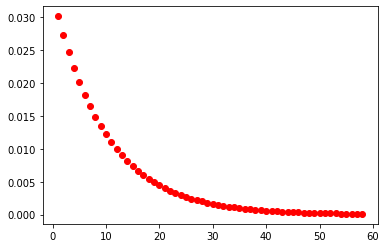

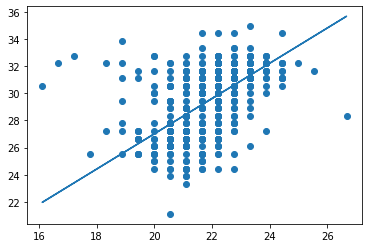

The end values are: theta0 is 1.3001428110403537, theta1 is 1.0140900947961065, the error is 5.314553331093175


In [9]:
if __name__ == "__main__":
    run()